In [1]:
import pandas as pd
import numpy as np

In [2]:
cluster_data = pd.read_csv('../data/customer_clean.csv')

In [3]:
cluster_data.head()

,Income,Customer Lifetime Value,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,dbscan_label
0,1.066513,-0.604887,0.560210,0.833817,1.274319,1.274511,0.559556,0
1,-1.243346,-0.604818,1.630814,-0.155595,0.802983,0.802854,1.574838,0
2,-1.243346,-0.604798,-0.272348,0.163170,-0.304169,-0.304190,-0.353333,0
3,-1.243346,-0.604798,0.635571,0.933172,0.563294,0.563295,0.879090,0
4,1.978193,-0.604355,0.334128,1.115324,0.464672,0.464633,-0.975637,0


In [6]:
X = cluster_data.copy()

In [8]:
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [10]:
import matplotlib.pyplot as plt

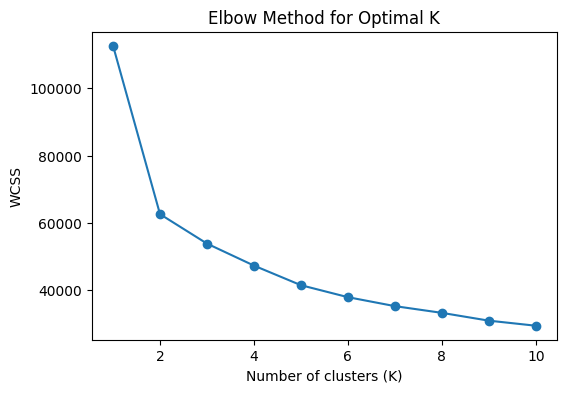

In [11]:

plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [12]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
cluster_data['cluster'] = labels


In [15]:
cluster_data['cluster'].value_counts()

cluster
1    7174
0    5031
2    4596
Name: count, dtype: int64

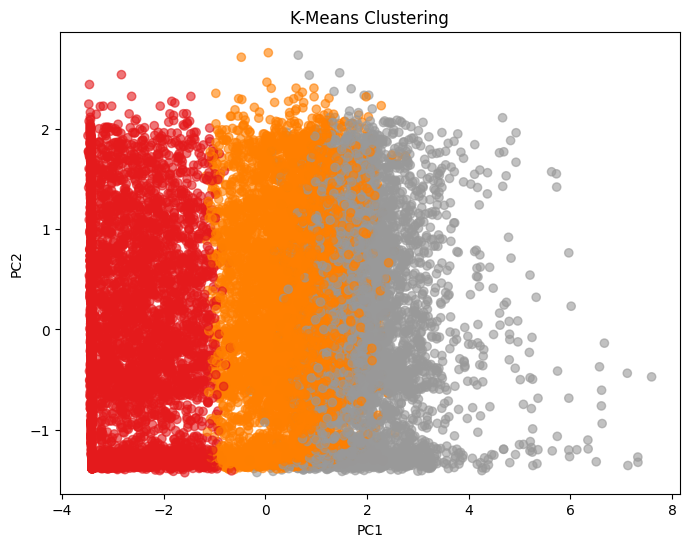

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(
    X_pca[:,0], X_pca[:,1],
    c=labels, cmap='Set1', alpha=0.6
)
plt.title("K-Means Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
